<h2 style="padding-left:20%;">EDA Analysis on Haberman Cancer Survival Dataset</h2>

      Haberman's Survival for Cancer Eda Analysis:
         The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of               Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
                         ********************************************

            Objective :
                 To analysis the dataset that if a patient is diagnosised with cancer treatment then give a solution             of  chances of surviving more than 5 years or not based upon patient_age ,operation_year and                    Axillary nodes.

In [438]:
#Importing all necessary modules for production
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Reading the csv file with pandas dataframe
df=pd.read_csv('haberman_cancer.csv')

In [171]:
#It shows the first 5 columns from the dataset
df.head()

,patient_age,operation_year,axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [172]:
#It shows the last 5 columns from the dataset
df.tail()

,patient_age,operation_year,axillary_nodes,survival_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [173]:
#Determining the shape of the dataset taken
df.shape

(305, 4)

In [174]:
#Information about the dataset taken for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
patient_age        305 non-null int64
operation_year     305 non-null int64
axillary_nodes     305 non-null int64
survival_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [175]:
#Columns which we have in the dataset
df.columns

Index(['patient_age', 'operation_year', 'axillary_nodes', 'survival_status'], dtype='object')

    ****************************************************************************************************************
    Observation from the Dataset.
    The Dataset that which took about Haberman's survival of Cancer Dataset is in between in the year of 1958 -1970
     the following obserations that are made
    
    1. 305 dattapoints
    2. Contains four(4) features
       a) Age of the patient
       b) Operation done in the year
       c) No:of Auxiliary Nodes for the patient
       d) Patient status in which classified into two scales
         1) Status '1' means patient who lived more than 5 years after operation
         2) Status '2' means patient who dies before 5 years after operation
           

In [176]:
#Calcuating the count of patient for survival_status
df['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

In [177]:
#Calculating count of total patient admitted for every year in the hospital
df['operation_year'].value_counts()

58    36
64    30
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: operation_year, dtype: int64

In [178]:
#Calucating mean of total patient admitted for every year in the hospital
df['operation_year'].value_counts().mean()

25.416666666666668

    ---------------------------------------------------------------------------------------------------------------
    The obseration from this above code is that 
     People who lived for more than 5 years i.e(Status 1) :  224
     People who died before 5 years         i.e(Status 2) :  81
     We can observe that every year nearly average 25 cancer patients admitted for this treatment in the hospital.
     Imbalanced dataset


# 2-D Scatter Plot

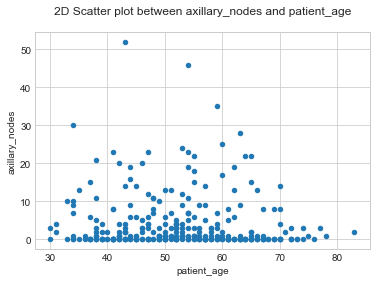

In [477]:
#2D Scatter plot between axillary nodes and patient age
df.plot(kind='scatter', x='patient_age', y='axillary_nodes') ;
plt.title('2D Scatter plot between axillary_nodes and patient_age\n',size=12)
plt.show()

    ****************************************************************************************************************
    By observing above 2D Scatter plot we cannot conlcude anything because points are not linearly separable.
     But most of the points are in between 0-10 axillary lymph nodes.

#### 2-D Scatter plot with color-coding

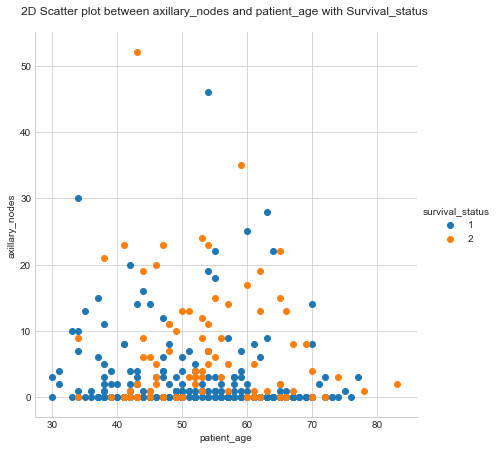

In [478]:
#2D Scatter plot with color coding between patient_age and axillary nodes
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=6).map(plt.scatter, "patient_age", "axillary_nodes").add_legend()
plt.title('2D Scatter plot between axillary_nodes and patient_age with Survival_status \n',size=12)
plt.show();

In [431]:
status1=df[(df['survival_status']==1) & (df['axillary_nodes']<5)]
status2=df[(df['survival_status']==2) & (df['axillary_nodes']<5)]
print('Number of patients survived more than 5 years with less than 10 axillary nodes:',len(status1))
print('Number of patients survived less than 5 years with less than 10 axillary nodes:',len(status2))

Number of patients survived more than 5 years with less than 10 axillary nodes: 187
Number of patients survived less than 5 years with less than 10 axillary nodes: 42


    **************************************************************************************************************
    By observing the 2D Scatter plot with color coding that the points are not linearly separable
     for the classification.

    1. If we can also observe that more points are consolidated between 0-10 axillary nodes from the scatter plot.
     And by calculation it shows that the patient who have less than or equal to 10 axillary nodes are pointed out
    
    2.It draws the attention that 207 patients survived with status 1 and 57 points survived with status 2
    
    3.We can conclude that survival ratio of patient lived for more than 5 years is greater than patient died before         5 years for patient having less than 10 axillary lymph nodes.

# Pair-plot

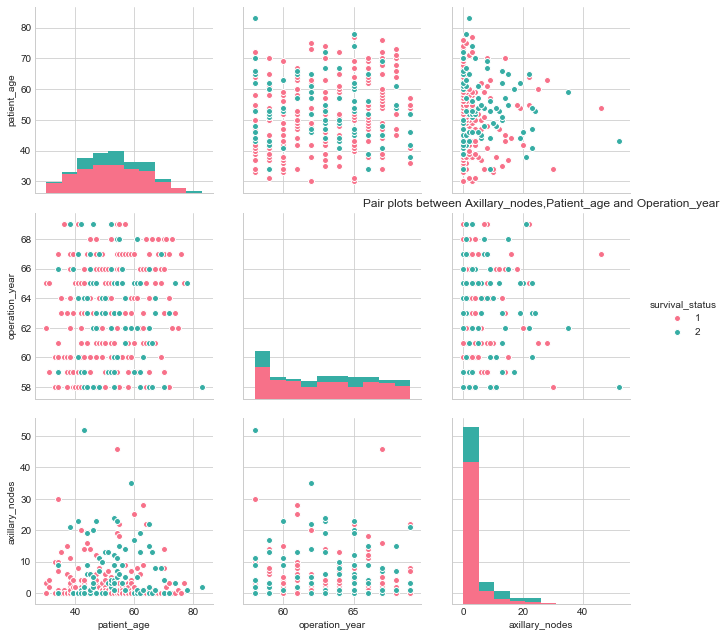

In [509]:
#Pair plots for the dataset taken
#to view 2D dimensional patterns
#Diagonal elements are histograms
#Seaborn is module for beautyfing the plots in python
sns.set_style('whitegrid')
sns.pairplot(df,vars=['patient_age','operation_year','axillary_nodes'],hue='survival_status',size=3,palette="husl")
plt.title('Pair plots between Axillary_nodes,Patient_age and Operation_year')
plt.show()

    
    *************************************************************************************************************
    By observing the above pair plots we get that all most plots are anable to classify and conclude because
                    plots are scattered with all most overlapping.
     
    1.But we can see the plot between patient_age and the axillary_nodes are not fully linearly separable but some           points so we cannot build a model right away here but these two parameters may be useful for futher                   classification.
        

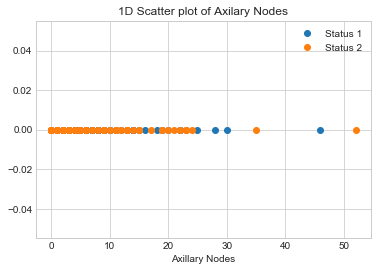

In [472]:
#Classifying datapoints into 2 division based on survival_status
df1= df.loc[df["survival_status"] == 1];
df2= df.loc[df["survival_status"] ==2];
#df1 means data for survival_status==1
#df2 means data for survival_status==2
plt.plot(df1['axillary_nodes'], np.zeros_like(df1['axillary_nodes']), 'o')
plt.plot(df2['axillary_nodes'], np.zeros_like(df2['axillary_nodes']), 'o')
plt.legend(('Status 1','Status 2'))
plt.xlabel('Axillary Nodes')
plt.title('1D Scatter plot of Axilary Nodes')
plt.show()

    ****************************************************************
    All points are overlapping very much we cannot conclude anything.

# Histogram

/Users/saideshwarkotha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/saideshwarkotha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


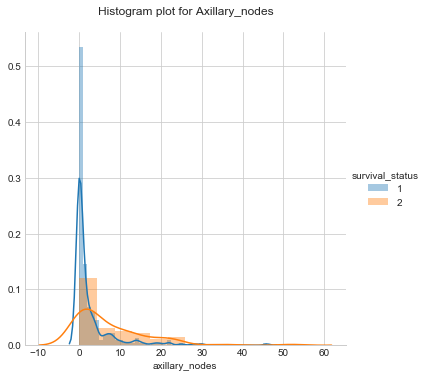

In [474]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "axillary_nodes").add_legend();
plt.title('Histogram plot for Axillary_nodes\n')
plt.show();

    ***********************************************************************************************************
    From this plot we can say that patients having axillary nodes between 0-5 can have more chance of surviving
    more than 5 years after diagnosis.

/Users/saideshwarkotha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/saideshwarkotha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


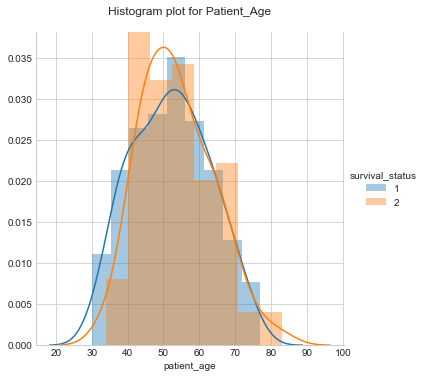

In [475]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "patient_age").add_legend();
plt.title('Histogram plot for Patient_Age\n')
plt.show();

    ********************************************************************************
    We cannot conclude anything from this plot because almost the plot is overlapping.

/Users/saideshwarkotha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/saideshwarkotha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


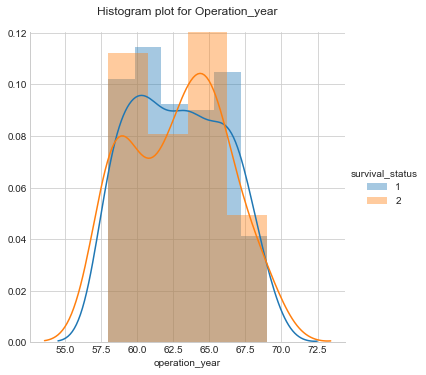

In [476]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "operation_year").add_legend();
plt.title('Histogram plot for Operation_year\n')
plt.show();

    *********************************************************************************
    We cannot conclude anything from this plot because almost the plot is overlapping.


# PDF, CDF

Pdf values for df1: [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
------------------------
Bin-edges for df1: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

***************************************

Pdf values for df2: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
------------------------
Bin-edges for df2: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


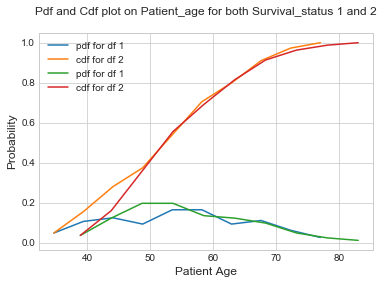

In [499]:
#For data df1(Survival_status==1)
counts, bin_edges = np.histogram(df1['patient_age'], bins=10,density = True)
pdf = counts/(sum(counts))
print('Pdf values for df1:',pdf)
print('------------------------')
print('Bin-edges for df1:',bin_edges)
print('\n***************************************')
#Calculating CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for df 1')
plt.plot(bin_edges[1:], cdf,label='cdf for df 2')
plt.xlabel('Patient Age',size=12)
plt.ylabel('Probability',size=12)
#For data df2(Survival_status==2)
counts, bin_edges = np.histogram(df2['patient_age'], bins=10,density = True)
pdf = counts/(sum(counts))
print('\nPdf values for df2:',pdf)
print('------------------------')
print('Bin-edges for df2:',bin_edges)
#Calculating CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for df 1')
plt.plot(bin_edges[1:], cdf,label='cdf for df 2')
plt.title('Pdf and Cdf plot on Patient_age for both Survival_status 1 and 2\n')
plt.legend()
plt.show()

     ******************************************************************************************************
     We can observe two things form this plot.
     1.Typically most patients having less than 37 years age have survived more than 5 years after diagnosis .
     2.And patients having more than 76 years age have died before 5 years after diagnosis.

Pdf values for df1: [0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
------------------------
Bin-edges for df1: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

***************************************

Pdf values for df2: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
------------------------
Bin-edges for df2: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


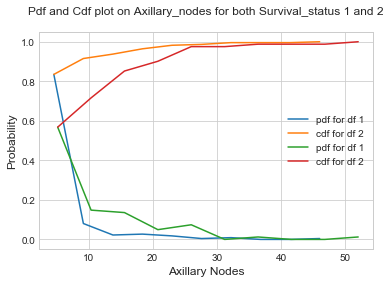

In [498]:
#For data df1(Survival_status==1)
counts, bin_edges = np.histogram(df1['axillary_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print('Pdf values for df1:',pdf)
print('------------------------')
print('Bin-edges for df1:',bin_edges)

print('\n***************************************')
#Calculating CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for df 1')
plt.plot(bin_edges[1:], cdf,label='cdf for df 2')
plt.xlabel('Axillary Nodes',size=12)
plt.ylabel('Probability',size=12)
#For data df2(Survival_status==2)
counts, bin_edges = np.histogram(df2['axillary_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print('\nPdf values for df2:',pdf)
print('------------------------')
print('Bin-edges for df2:',bin_edges)

#Calculating CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for df 1')
plt.plot(bin_edges[1:], cdf,label='cdf for df 2')
plt.title('Pdf and Cdf plot on Axillary_nodes for both Survival_status 1 and 2\n')
plt.legend()
plt.show()

     *******************************************************************************
     We can observe one thing form this plot.
     1.Patient having more than 46 axillary_nodes died before 5 years after diagnosis

Pdf values for df1: [0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
------------------------
Bin-edges for df1: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

***************************************

Pdf values for df2: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
------------------------
Bin-edges for df2: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


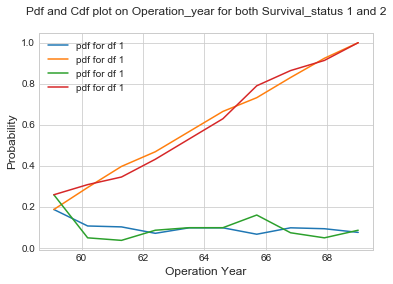

In [497]:
#For data df1(Survival_status==1)
counts, bin_edges = np.histogram(df1['operation_year'], bins=10,density = True)
pdf = counts/(sum(counts))
print('Pdf values for df1:',pdf)
print('------------------------')
print('Bin-edges for df1:',bin_edges)
print('\n***************************************')
#Calculating CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for df 1')
plt.plot(bin_edges[1:], cdf,label='pdf for df 1')
plt.xlabel('Operation Year',size=12)
plt.ylabel('Probability',size=12)
#For data df2(Survival_status==2)
counts, bin_edges = np.histogram(df2['operation_year'], bins=10,density = True)
pdf = counts/(sum(counts))
print('\nPdf values for df2:',pdf)
print('------------------------')
print('Bin-edges for df2:',bin_edges)
#Calculating CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for df 1')
plt.plot(bin_edges[1:], cdf,label='pdf for df 1')
plt.title('Pdf and Cdf plot on Operation_year for both Survival_status 1 and 2\n')
plt.legend()
plt.show()

    **********************************************
    Almost the plot is intercepted with each other.

# Mean, Variance and Std-dev

In [352]:
#Calculating Mean Variance and Std-dev of Axillary_nodes 
print("Means:")
print(np.mean(df1["axillary_nodes"]))
print(np.mean(df2["axillary_nodes"]))

print("\nStd-dev:");
print(np.std(df1["axillary_nodes"]))
print(np.std(df2["axillary_nodes"]))


Means:
2.799107142857143
7.45679012345679

Std-dev:
5.869092706952767
9.128776076761632


In [463]:
#Calculating Mean Variance and Std-dev of patient_age
print("Means:")
print(np.mean(df1["patient_age"]))
print(np.mean(df2["patient_age"]))

print("\nStd-dev:");
print(np.std(df1["patient_age"]))
print(np.std(df2["patient_age"]))


Means:
52.11607142857143
53.67901234567901

Std-dev:
10.913004640364269
10.10418219303131


# Median, Percentile, Quantile, IQR, MAD

In [351]:
#Median, Quantiles, Percentiles, IQR for axillary Nodes
print("\nMedians:")
print(np.median(df1["axillary_nodes"]))
print(np.median(df2["axillary_nodes"]))

print("\nQuantiles:")
print(np.percentile(df1["axillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(df2["axillary_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df1["axillary_nodes"],90))
print(np.percentile(df2["axillary_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df1["axillary_nodes"]))
print(robust.mad(df2["axillary_nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


In [433]:
#Median, Quantiles, Percentiles, IQR for patient_age
print("\nMedians:")
print(np.median(df1["patient_age"]))
print(np.median(df2["patient_age"]))

print("\nQuantiles:")
print(np.percentile(df1["patient_age"],np.arange(0, 100, 25)))
print(np.percentile(df2["patient_age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df1["patient_age"],90))
print(np.percentile(df2["patient_age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df1["patient_age"]))
print(robust.mad(df2["patient_age"]))


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Boxplot

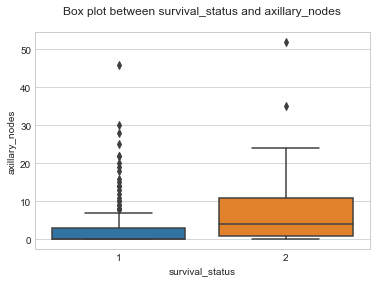

In [462]:
sns.boxplot(x='survival_status',y='axillary_nodes', data=df)
plt.title('Box plot between survival_status and axillary_nodes\n',size=12)
plt.show()

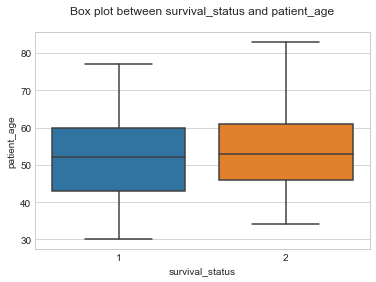

In [461]:
sns.boxplot(x='survival_status',y='patient_age', data=df)
plt.title('Box plot between survival_status and patient_age\n',size=12)
plt.show()

# Violin Plot

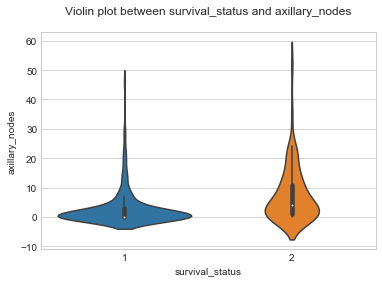

In [460]:
sns.violinplot(x="survival_status", y="axillary_nodes", data=df, size=8)
plt.title('Violin plot between survival_status and axillary_nodes\n',size=12)
plt.show()

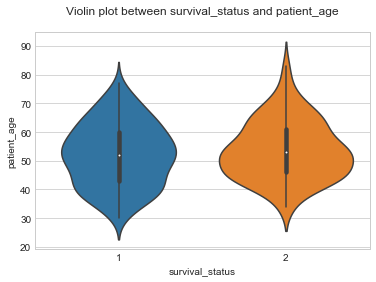

In [487]:
sns.violinplot(x="survival_status", y="patient_age", data=df, size=8)
plt.title('Violin plot between survival_status and patient_age\n',size=12)
plt.show()

# Multivariate Probability density, Contour plot

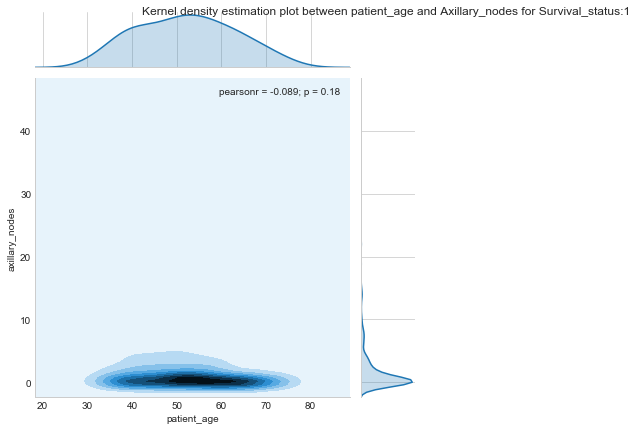

In [458]:
#df1 means data of patient survived more than 5 years (Status=1)
sns.jointplot(x='patient_age',y='axillary_nodes',data=df1,kind='kde')
plt.title('Kernel density estimation plot between patient_age and Axillary_nodes for Survival_status:1 \n\n\n\n\n',size=12)
plt.show()

In [501]:
count=df1[(df1['patient_age']>48) & (df1['patient_age']<63)]
print('Patient count survived between 48 to 63 years:',len(count))


Patient count survived between 48 to 63 years: 95


    ***************************************************************************************************
    We observe that most of the patient who survived more than 5 years are in bewteen 48 to 63 years age

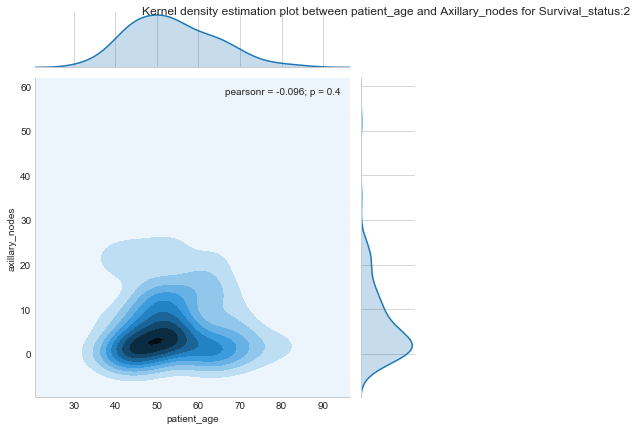

In [503]:
#df2 means data of patient died before than 5 years (Status=2)

sns.jointplot(x='patient_age',y='axillary_nodes',data=df2,kind='kde')
plt.title('Kernel density estimation plot between patient_age and Axillary_nodes for Survival_status:2 \n\n\n\n\n',size=12)
plt.show()

In [422]:
df2[(df2['patient_age']>48) & (df2['patient_age']<51)]

,patient_age,operation_year,axillary_nodes,survival_status
113,49,63,0,2
114,49,64,10,2
123,50,63,13,2
124,50,64,0,2


    ***************************************************************************************************
    We observe that a very very small portion patients died before 5 years age in between 48 to 51 years.

    ****************************************************************************************************
    Summary:
           We this kind we cannot build perfect model to identity a patient can survive for more than 5 years
           or may die before
           But some conclusions can be made:
           1. Patients having more than 46 axillary nodes cannot survive for more than 5 years.
           2. Patients who are having an age more than 76 years age at the time of operation cannot survive for more          than 5 years.
           3. Patients having less than age of 37 have more chance for surviving more than 5 years.
           4. Almost 75% of axillary nodes are in between 0-5.
           